In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

#Picking random samples from different data sets. 
#Limited to 4500 samples due to processing

df2 = pd.read_csv('1.csv')
df2=df2.sample(500)

df3 = pd.read_csv('2.csv')
df3 = df3.sample(500)

df4 = pd.read_csv('3.csv')
df4 = df4.sample(500)

df5 = pd.read_csv('4.csv')
df5 = df5.sample(500)

df6 = pd.read_csv('5.csv')
df6 = df6.sample(500)

df7 = pd.read_csv('6.csv')
df7 = df7.sample(500)

df8 = pd.read_csv('7.csv')
df8 = df8.sample(500)

df9 = pd.read_csv('8.csv')
df9 = df9.sample(500)

df10 = pd.read_csv('10.csv')
df10 = df10.sample(500)

df = [df2, df3, df4, df5, df6, df7, df8, df9, df10]
df = pd.concat(df)

df.columns



Index(['time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z'],
      dtype='object')

## Linear Regression

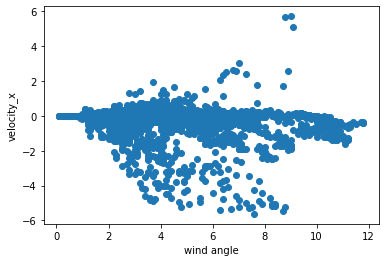

In [39]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('velocity_x')
plt.scatter(df.wind_speed,df.velocity_x)

In [42]:
reg_x = linear_model.LinearRegression()
reg_x.fit(df[['wind_speed']], df.velocity_x)

LinearRegression()

In [43]:
print(reg_x.predict(np.array([11]).reshape(1,1)))

print(reg_x.predict(np.array([9]).reshape(1,1)))

print(reg_x.predict(np.array([2]).reshape(1,1)))

[-0.76959004]
[-0.63026257]
[-0.14261643]


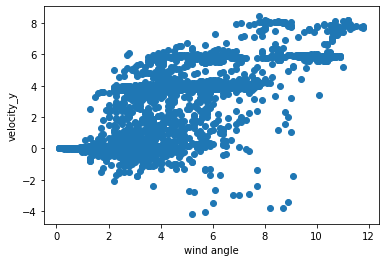

In [44]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('velocity_y')
plt.scatter(df.wind_speed,df.velocity_y)

In [47]:
reg_y = linear_model.LinearRegression()
reg_y.fit(df[['wind_speed']], df.velocity_y)

LinearRegression()

In [48]:
print(reg_y.predict(np.array([11]).reshape(1,1)))

print(reg_y.predict(np.array([9]).reshape(1,1)))

print(reg_y.predict(np.array([2]).reshape(1,1)))

[7.3993952]
[5.9196363]
[0.74048014]


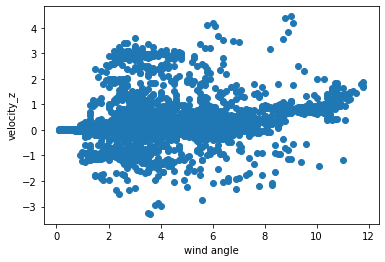

In [49]:
%matplotlib inline
plt.xlabel('wind speed')
plt.ylabel('velocity_z')
plt.scatter(df.wind_speed,df.velocity_z)

In [50]:
reg_z = linear_model.LinearRegression()
reg_z.fit(df[['wind_speed']], df.velocity_z)

LinearRegression()

In [51]:
print(reg_z.predict(np.array([11]).reshape(1,1)))

print(reg_z.predict(np.array([9]).reshape(1,1)))

print(reg_z.predict(np.array([2]).reshape(1,1)))

[0.82065131]
[0.64151258]
[0.01452699]


## Support Vector Machine

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df.columns

Index(['time', 'wind_speed', 'wind_angle', 'battery_voltage',
       'battery_current', 'position_x', 'position_y', 'position_z',
       'orientation_x', 'orientation_y', 'orientation_z', 'orientation_w',
       'velocity_x', 'velocity_y', 'velocity_z', 'angular_x', 'angular_y',
       'angular_z', 'linear_acceleration_x', 'linear_acceleration_y',
       'linear_acceleration_z'],
      dtype='object')

In [27]:
velocity_x = df.drop(['velocity_x'], axis=1)
Y1 = df['velocity_x']
velocity_x_train, velocity_x_test, Y1_train, Y1_test = train_test_split(velocity_x, Y1, test_size=0.33)

velocity_y = df.drop(['velocity_y'], axis=1)
Y2 = df['velocity_y']
velocity_y_train, velocity_y_test, Y2_train, Y2_test = train_test_split(velocity_y, Y2, test_size=0.33)

velocity_z = df.drop(['velocity_z'], axis=1)
Y3 = df['velocity_z']
velocity_z_train, velocity_z_test, Y3_train, Y3_test = train_test_split(velocity_z, Y3, test_size=0.33)

In [28]:
clfx = SVC(kernel='linear')
clfx.fit(velocity_x_train, Y1_train.astype('int'))

SVC(kernel='linear')

In [29]:
clfy = SVC(kernel='linear')
clfy.fit(velocity_y_train, Y2_train.astype('int'))


SVC(kernel='linear')

In [30]:
clfz = SVC(kernel='linear')
clfz.fit(velocity_z_train, Y3_train.astype('int'))

SVC(kernel='linear')

In [54]:
Y1_pred = clfx.predict(velocity_x_test)
Y2_pred = clfy.predict(velocity_y_test)
Y3_pred = clfz.predict(velocity_z_test)

In [55]:
print(classification_report(Y1_test.astype('int'), Y1_pred))
print(classification_report(Y2_test.astype('int'), Y2_pred))
print(classification_report(Y3_test.astype('int'), Y3_pred))

              precision    recall  f1-score   support

          -5       1.00      0.17      0.29         6
          -4       0.11      0.25      0.15         4
          -3       0.33      0.36      0.35        11
          -2       0.00      0.00      0.00        18
          -1       0.00      0.00      0.00       107
           0       0.91      1.00      0.95      1331
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         0
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1

    accuracy                           0.90      1485
   macro avg       0.29      0.28      0.24      1485
weighted avg       0.82      0.90      0.86      1485

              precision    recall  f1-score   support

          -4       1.00      1.00      1.00         1
          -3       0.00      0.00      0.00         1
          -2       1.00      0.80      0.89         5
          -1       1.00 